# 2. COMPAS dataset (Scarlett+Lily)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import tree

In [2]:
url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

* `Age`: The defendent's age in years
* `c_charge_degree`: The type of crime a defendent has been charged with, either M (misdemeanor, less serious), or F(felony, more serious)
* `race`: Defendent's race (categorical)
* `sex`: Defendent's biological sex (M/F)
* `length_of_stay`: How long between when a defendant was charged and when they were released 
* `priors_count`: Count for number of prior times a defendant has been charged
* `juv_fel_count`: Count for number of times a defendant was charged with a felony as a juvenile
* `juv_misd_count`: Count for number of times a defendant was charged with a misdemeanor as a juvenile
* `juv_other_count`: Count for number of times a defendant was charged with something else as a juvenile
* `c_charge_desc`: Specific text field with type of charge.

Variables that are pre-processed data include:

* `length_of_stay_thresh`: A thresholded version of `length_of_stay` variable, preprocessed such that values above 30 have been capped at 30
* `priors_1`: Indicator variable derived from `priors_count`, preprocessed such that 1 if `priors_count`=1, 0 otherwise
* `priors_234`: Indicator variable derived from `priors_count`, preprocessed such that 1 if `priors_count` is 2, 3, 4; 0 otherwise
* `priors_5plus`: Another indicator variable derived from `priors_count`, preprocessed such that 1 if `priors_count`=5 or more, 0 otherwise
* `juv_fel_1plus`: Indicator variable derived from `juv_fel_count`, 1 if `juv_fel_count`, is 1 or more; 0 otherwise
* `juv_misd_1plus`: Indicator variable derived from `juv_misd_count`, 1 if `juv_misd_count`, is 1 or more; 0 otherwise
* `juv_other_1plus`: Indicator variable derived from `juv_other_count`, 1 if `juv_other_count`, is 1 or more; 0 otherwise
* `charge_any_drug`: Indicator variable derived from `c_charge_desc`, indicating our best guess as to whether the crime charged was drug-related
* `charge_any_violence_aggression`: Indicator variable derived from `c_charge_desc`, indicating our best guess as to whether the crime charged was violence or aggression related
* `charge_any_theft`: Indicator variable derived from `c_charge_desc`, indicating our best guess as to whether the crime charged was theft or burglary related

The target outcome variable is `two_year_recid`, which indicates whether or not a defendent recidivated within two years.

The variable `decile_score` is a 1-10 COMPAS score based on decile, and the variable `score_text` is a Low/Medium/High score category from COMPAS. Both of these variables should not be used in building our model.

In [ ]:
print(df.shape)
print(list(df.columns))

(7214, 53)
['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob', 'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number', 'r_charge_degree', 'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid', 'is_violent_recid', 'vr_case_number', 'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc', 'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date', 'v_type_of_assessment', 'v_decile_score', 'v_score_text', 'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1', 'start', 'end', 'event', 'two_year_recid']


In [ ]:
# age is a numeric variable while age_cat represents three categories of ages
print(df["age"].unique())
print(df["age_cat"].unique())

[69 34 24 23 43 44 41 39 21 27 37 47 31 25 64 32 36 26 33 30 55 49 29 51
 35 28 48 63 53 38 22 62 56 45 40 50 20 71 66 54 19 59 42 52 61 46 58 78
 57 70 60 68 65 83 67 75 72 74 96 73 18 77 80 76 79]
['Greater than 45' '25 - 45' 'Less than 25']


In [ ]:
print(df["priors_count.1"].unique())
print(df["priors_count"].unique())

[ 0  4  1  2 14  3  7  6  5 13  8  9 21 20 15 10 12 28 19 11 22 23 25 24
 36 18 16 33 17 30 27 38 26 37 29 35 31]
[ 0  4  1  2 14  3  7  6  5 13  8  9 21 20 15 10 12 28 19 11 22 23 25 24
 36 18 16 33 17 30 27 38 26 37 29 35 31]


In [ ]:
print(df["type_of_assessment"].unique())

['Risk of Recidivism']


In [ ]:
print(df["score_text"].unique())

['Low' 'High' 'Medium']


## 2.1 Literature Review

Correctional Offender Management Profiling for Alternative Sanctions(COMPAS) dataset, gathered by ProPublica [Angwin et al., 2016], contains information about the recidivism
risk predicted by the COMPAS tool, as well as the ground truth recidivism rates, for 7214 defendants who were arrested in Broward County, Florida, in the year of 2013 and 2014. The input used for prediction of recidivism is wide-scale and includes 137 factors like age, gender, and criminal history of the defendant. As COMPAS tool is helpful in ways that it provides scores from 1 to 10, classify the risk of recidivism as low-risk (1 to 4), medium-risk (5 to 7), or high-risk (8 to 10), it has been used to assess more than 1 million offenders since 1998. 

However, the tool suffers from machine bias and leads to racial disparities in the predictions. Black defendants who did not recidivate were incorrectly predicted to reoffend (False Positive) at a rate of 44.9%, nearly twice as high as their white counterparts at 23.5%; and white defendants who did recidivate were incorrectly predicted to not reoffend (False Negative) at a rate of 47.7%, nearly twice as high as their black counterparts at 28.0%. []

The popular fariness metrics are [Rahman, 2020]

- True Positive Rate (TPR) also called recall or sensitivity
- True Negative Rate (TNR) also called specificity
- Positive Predictive Value (PPV) also called precision 
- False Negative Rate (FNR)
- False Positive Rate (FPR) also called fall out 

And the formular are the followings: <br>
TPR = $\frac{TP}{Actual Positive}  = \frac{TP}{TP + FN}$ <br>
TNR = $\frac{TP}{Actual Negative}  = \frac{TN}{TN + FP}$ <br>
PPV = $ \frac{TP}{TP + FP}$ <br>
FNR = $\frac{FN}{Actual Positive} = \frac{FN}{FN + TP}$ <br>
FPR = $\frac{FP}{Actual Negative} = \frac{FP}{FP + TN}$ <br>




## 2.2 Data Analysis 

According to Northpointe’s practitioners guide, COMPAS' scores in the medium and high range garner more interest from supervision agencies than low scores, as a low score would suggest there is little risk of general recidivism.” So when turning the problem into a binary classification problem, we assume any score 5 or higher (medium or high risk) means that a defendant is treated as a likely recividist (1), and a score of 4 or lower (low risk) means that a defendant is treated as unlikely to re-offend (0). 

In [3]:
# turn into a binary classification problem
# create feature is_med_or_high_risk
df['medium_or_high_risk']  = (df['decile_score']>=5).astype(int)

The **“true”** recidivism value (whether or not the defendant committed another crime in the next two years) is in the two_year_recid column.

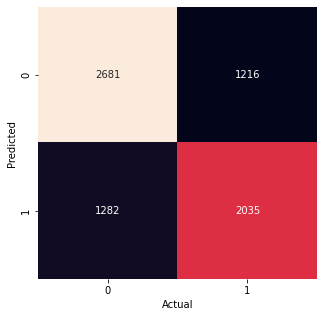

In [4]:
cm = pd.crosstab(df['medium_or_high_risk'], df['two_year_recid'], 
                               rownames=['Predicted'], colnames=['Actual'])
p = plt.figure(figsize=(5,5));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)

In [5]:
[[tn , fp],[fn , tp]]  = confusion_matrix(df['two_year_recid'], df['medium_or_high_risk'])
print("True negatives:  ", tn)
print("False positives: ", fp)
print("False negatives: ", fn)
print("True positives:  ", tp)

True negatives:   2681
False positives:  1282
False negatives:  1216
True positives:   2035


In [6]:
print("True positive rate (overall): ", tp/(tp+fn))
print("False positive rate (overall): ", fp/(fp+tn))
print("True negative rate (overall): ", tn/(tn+fp))
print("False negative rate (overall): ", fn/(fn+tp))
print("Positive predictive value (overall): ", tp/(tp+fp))
print("Overall accuracy (overall)", (tp+tn)/(tp+fp+fn+tn))

True positive rate (overall):  0.6259612426945556
False positive rate (overall):  0.32349230381024474
True negative rate (overall):  0.6765076961897553
False negative rate (overall):  0.3740387573054445
Positive predictive value (overall):  0.6135061802833887
Overall accuracy (overall) 0.6537288605489326


Text(0.5, 0, 'False Positive Rate')

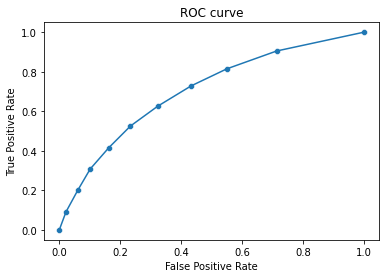

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(df['two_year_recid'], df['decile_score'])
sns.scatterplot(x=fpr, y=tpr, )
sns.lineplot(x=fpr, y=tpr)
plt.title("ROC curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

In [8]:
print("AUC:", roc_auc_score(df['two_year_recid'], df['decile_score']))

AUC: 0.7021662544019724


In [9]:
df['race'].value_counts()

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

We will focus primarily on African-American or Caucasian defendants, since they are the subject of the ProPublica claim.

In [10]:
df_black = df[df['race']=="African-American"].copy()
df_black['medium_or_high_risk'] = (df_black['decile_score']>=5).astype(int)
[[tn , fp],[fn , tp]]  = confusion_matrix(df_black['two_year_recid'], df_black['medium_or_high_risk'])
print("False positive rate (Black)      : ", fp/(fp+tn))
print("False negative rate (Black)      : ", fn/(fn+tp))
print("True positive rate (overall): ", tp/(tp+fn))
print("True negative rate (Black): ", tn/(tn+fp))
print("Positive predictive value (Black): ", tp/(tp+fp))
print("Overall accuracy (Black)", (tp+tn)/(tp+fp+fn+tn))

False positive rate (Black)      :  0.44846796657381616
False negative rate (Black)      :  0.27985270910047344
True positive rate (overall):  0.7201472908995266
True negative rate (Black):  0.5515320334261838
Positive predictive value (Black):  0.6297148114075437
Overall accuracy (Black) 0.6382575757575758


In [11]:
df_white = df[df['race']=="Caucasian"].copy()
df_white['medium_or_high_risk'] = (df_white['decile_score']>=5).astype(int)
[[tn , fp],[fn , tp]]  = confusion_matrix(df_white['two_year_recid'], df_white['medium_or_high_risk'])
print("False positive rate (white)      : ", fp/(fp+tn))
print("False negative rate (white)      : ", fn/(fn+tp))
print("True positive rate (white): ", tp/(tp+fn))
print("True negative rate (white): ", tn/(tn+fp))
print("Positive predictive value (white): ", tp/(tp+fp))
print("Overall accuracy (white)", (tp+tn)/(tp+fp+fn+tn))

False positive rate (white)      :  0.23454301075268819
False negative rate (white)      :  0.4772256728778468
True positive rate (white):  0.5227743271221532
True negative rate (white):  0.7654569892473119
Positive predictive value (white):  0.5913348946135831
Overall accuracy (white) 0.6699266503667481


This shows COMPAS scores appeared to favor white defendants over black defendants by underpredicting recidivism for white and overpredicting recidivism for black defendants.

|  | Overall | White | Black |
| ------ | ------- | ------ | ------ |
| FPR | 0.352 | 0.235 | 0.448|
| FNR | 0.346  | 0.477 | 0.280|
| TPR | 0.654 | 0.523 | 0.630|
| TNR | 0.648 | 0.765 | 0.552|
| Accuracy | 0.654 | 0.638 | 0.670 |

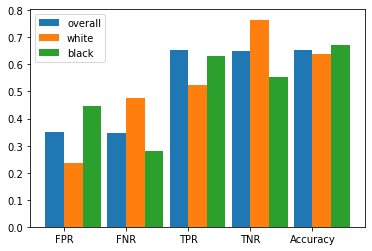

In [12]:
metrics = ["FPR","FNR","TPR","TNR","Accuracy"]
overall = [0.352,0.346,0.654,0.648,0.654]
white = [0.235,0.477,0.523,0.765,0.638]
black = [0.448,0.280,0.630,0.552,0.670]

bar_width = 0.3
index_overall = np.arange(len(metrics))
index_white = index_overall + bar_width
index_black = index_white + bar_width

plt.bar(index_overall,height=overall,width=bar_width,label="overall")
plt.bar(index_white,height=white,width=bar_width,label="white")
plt.bar(index_black,height=black,width=bar_width,label="black")
plt.xticks(index_overall+bar_width/2,metrics)
plt.legend()

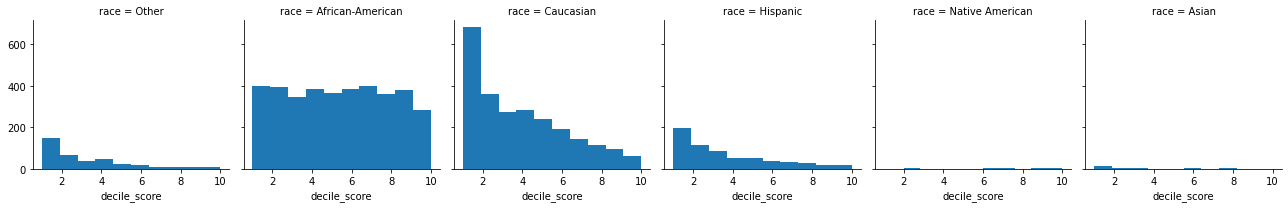

In [14]:
# frequency plot
g = sns.FacetGrid(df, col="race", margin_titles=True);
g.map(plt.hist, "decile_score", bins=10);

## 2.3 Binary Classification Pipeline - Logistics Regression

In [13]:
def process_COMPAS(temp_df, is_GAN = False):
    """
    Pick columns = ['age_cat','priors_count','sex_numeric','juv_fel_count', 'juv_misd_count', 
    'juv_other_count', 'length_of_stay','race','two_year_recid', 'c_charge_degree'] 
    from the dataframe. Convert category data into numeric and remove races other 
    than Caucasian or African-American. 
    
    Input: COMPAS dataframe
    Output: 
           COMPAS dataframe after cleaning
            age_cat                    int64
            priors_count               int64
            sex_numeric                int64
            juv_fel_count              int64
            juv_misd_count             int64
            juv_other_count            int64
            c_charge_degree_numeric    int64
            length_of_stay             int64
            race                       int64
            two_year_recid             int64
    """
    # deepcopy
    df = temp_df.copy()
    
    # remove invalid/null entries
    df = df[(df['days_b_screening_arrest'] <= 30)
                & (df['days_b_screening_arrest'] >= -30)
                & (df['is_recid'] != -1)
                & (df['c_charge_degree'] != 'O')
                & (df['score_text'] != 'N/A')]
    # remove races other than Caucasian or African-American
    df = df[(df['race']=='Caucasian') | (df['race']=='African-American')]

    # calculate length_of_stay
    df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])
    df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
    # the number of seconds to the unix epoch start
    df['length_of_stay'] = (df['c_jail_out'] - df['c_jail_in']).astype(int) / 10**9 
    # convert seconds into month
    df['length_of_stay'] /= 60 * 60 * 24 * 31
    df['length_of_stay'] = df['length_of_stay'].astype(int)
    df = df.drop_duplicates()

    # convert category data into numeric
    df['sex_numeric'] = pd.factorize(df['sex'])[0]
    df['c_charge_degree_numeric'] = pd.factorize(df['c_charge_degree'])[0]
    race = {0: 'Caucasian', 1: 'African-American'}
    df["race"] = df["race"].map({v: k for k, v in race.items()})
    
    if is_GAN:
      # don't need to bin age
      df["age_cat"] = df["age"]
    else:
      age = {1: 'Greater than 45', 0: '25 - 45', -1: 'Less than 25'}
      df["age_cat"] = df["age_cat"].map({v: k for k, v in age.items()})

    cols = ['age_cat','priors_count','sex_numeric','juv_fel_count', 'juv_misd_count', 'juv_other_count', 'c_charge_degree_numeric', 'length_of_stay','race','two_year_recid']
    df = df[cols]
    
    return df

In [14]:
def logisticRegression(x_train, y_train, x_test):
  
    logisticRegr = LogisticRegression(solver='lbfgs', max_iter=500)
    logisticRegr.fit(x_train, y_train)

    predictions = logisticRegr.predict(x_test)
    return predictions

In [15]:
df = process_COMPAS(df)

# Split processed data into train and test (fixed random seed)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=0)

# Split test data into X and y
x_train, y_train = train_data.drop(["two_year_recid","race"], axis=1), train_data["two_year_recid"]
x_test, y_test = test_data.drop(["two_year_recid","race"], axis=1), test_data["two_year_recid"]

In [16]:
# predictions of testing data
predictions = logisticRegression(x_train, y_train, x_test)
predictions.shape

(1056,)

In [17]:
def predictionSummary(x, y_real, y_predict):
    tn, fp, fn, tp = confusion_matrix(y_real, y_predict, labels=[0, 1]).ravel()
    overall = [fp/(fp+tn),fn/(fn+tp),tp/(tp+fn),tn/(tn+fp),(tp+tn)/(tp+fp+fn+tn)]
    print("True positive rate (overall): ", tp/(tp+fn))
    print("False positive rate (overall): ", fp/(fp+tn))
    print("True negative rate (overall): ", tn/(tn+fp))
    print("False negative rate (overall): ", fn/(fn+tp))
    print("Overall accuracy (overall)", (tp+tn)/(tp+fp+fn+tn),"\n")

    x['medium_or_high_risk'] = y_predict
    x['two_year_recid'] = y_real
    x_black = x[df['race'] == 1].copy()
    tn, fp, fn, tp = confusion_matrix(x_black['two_year_recid'], x_black['medium_or_high_risk'], labels=[0, 1]).ravel()
    black = [fp/(fp+tn),fn/(fn+tp),tp/(tp+fn),tn/(tn+fp),(tp+tn)/(tp+fp+fn+tn)]
    print("True positive rate (balck): ", tp/(tp+fn))
    print("False positive rate (balck): ", fp/(fp+tn))
    print("True negative rate (black): ", tn/(tn+fp))
    print("False negative rate (black): ", fn/(fn+tp))
    print("Overall accuracy (black)", (tp+tn)/(tp+fp+fn+tn),"\n")

    x_white = x[df['race'] == 0].copy()
    tn, fp, fn, tp = confusion_matrix(x_white['two_year_recid'], x_white['medium_or_high_risk'], labels=[0, 1]).ravel()
    white = [fp/(fp+tn),fn/(fn+tp),tp/(tp+fn),tn/(tn+fp),(tp+tn)/(tp+fp+fn+tn)]
    print("True positive rate (white): ", tp/(tp+fn))
    print("False positive rate (white): ", fp/(fp+tn))
    print("True negative rate (white): ", tn/(tn+fp))
    print("False negative rate (white): ", fn/(fn+tp))
    print("Overall accuracy (white)", (tp+tn)/(tp+fp+fn+tn),"\n")

    metrics = ["FPR","FNR","TPR","TNR","Accuracy"]
    bar_width = 0.3
    index_overall = np.arange(len(metrics))
    index_white = index_overall + bar_width
    index_black = index_white + bar_width

    plt.bar(index_overall,height=overall,width=bar_width,label="overall")
    plt.bar(index_white,height=white,width=bar_width,label="white")
    plt.bar(index_black,height=black,width=bar_width,label="black")
    plt.xticks(index_overall+bar_width/2,metrics)
    plt.legend()

    return

True positive rate (overall):  0.5501066098081023
False positive rate (overall):  0.313458262350937
True negative rate (overall):  0.686541737649063
False negative rate (overall):  0.44989339019189767
Overall accuracy (overall) 0.6259469696969697 

True positive rate (balck):  0.66996699669967
False positive rate (balck):  0.39184952978056425
True negative rate (black):  0.6081504702194357
False negative rate (black):  0.33003300330033003
Overall accuracy (black) 0.6382636655948553 

True positive rate (white):  0.3313253012048193
False positive rate (white):  0.22014925373134328
True negative rate (white):  0.7798507462686567
False negative rate (white):  0.6686746987951807
Overall accuracy (white) 0.6082949308755761 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


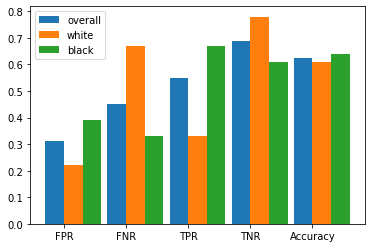

In [18]:
predictionSummary(x_test, y_test, predictions)

True positive rate (overall):  0.602780536246276
False positive rate (overall):  0.2558876811594203
True negative rate (overall):  0.7441123188405797
False negative rate (overall):  0.3972194637537239
Overall accuracy (overall) 0.6766935101847465 

True positive rate (balck):  0.6804123711340206
False positive rate (balck):  0.3238493723849372
True negative rate (black):  0.6761506276150627
False negative rate (black):  0.31958762886597936
Overall accuracy (black) 0.6784175479827653 

True positive rate (white):  0.4420731707317073
False positive rate (white):  0.175715695952616
True negative rate (white):  0.824284304047384
False negative rate (white):  0.5579268292682927
Overall accuracy (white) 0.6740563211503895 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


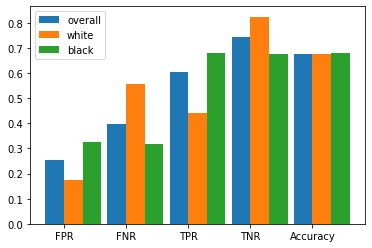

In [19]:
# predictions of training data
predictions = logisticRegression(x_train, y_train, x_train)
predictionSummary(x_train, y_train, predictions)

## 2.4 Binary Classification Pipeline - Decision Tree

In [20]:
def decisionTree(x_train, y_train, x_test):
    clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')
    clf = clf.fit(x_train, y_train)

    predictions = clf.predict(x_test)
    return predictions

In [21]:
url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
df = pd.read_csv(url)
df = process_COMPAS(df)
# Split processed data into train and test (fixed random seed)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=0)

# Split test data into X and y
x_train, y_train = train_data.drop(["two_year_recid","race"], axis=1), train_data["two_year_recid"]
x_test, y_test = test_data.drop(["two_year_recid","race"], axis=1), test_data["two_year_recid"]

True positive rate (overall):  0.5607675906183369
False positive rate (overall):  0.3049403747870528
True negative rate (overall):  0.6950596252129472
False negative rate (overall):  0.43923240938166314
Overall accuracy (overall) 0.6354166666666666 

True positive rate (balck):  0.66996699669967
False positive rate (balck):  0.3667711598746082
True negative rate (black):  0.6332288401253918
False negative rate (black):  0.33003300330033003
Overall accuracy (black) 0.6511254019292605 

True positive rate (white):  0.3614457831325301
False positive rate (white):  0.23134328358208955
True negative rate (white):  0.7686567164179104
False negative rate (white):  0.6385542168674698
Overall accuracy (white) 0.6129032258064516 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


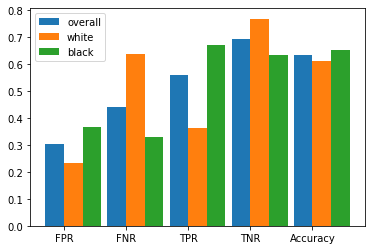

In [22]:
# predictions of testing data
# x_train, x_test, y_train, y_test = process_COMPAS_small(df)
predictions = decisionTree(x_train, y_train, x_test)
predictionSummary(x_test, y_test, predictions)

True positive rate (overall):  0.6285998013902682
False positive rate (overall):  0.23052536231884058
True negative rate (overall):  0.7694746376811594
False negative rate (overall):  0.3714001986097319
Overall accuracy (overall) 0.702273803884415 

True positive rate (balck):  0.6936671575846833
False positive rate (balck):  0.28451882845188287
True negative rate (black):  0.7154811715481172
False negative rate (black):  0.30633284241531666
Overall accuracy (black) 0.7038777908343126 

True positive rate (white):  0.49390243902439024
False positive rate (white):  0.16683119447186576
True negative rate (white):  0.8331688055281342
False negative rate (white):  0.5060975609756098
Overall accuracy (white) 0.6998202516476932 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


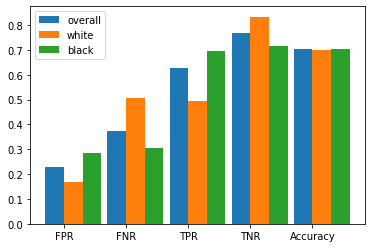

In [23]:
predictions = decisionTree(x_train, y_train, x_train)
predictionSummary(x_train, y_train, predictions)

## 2.5 Hypothesis Test Pipeline 

In [ ]:
# Assumptions

# Observations in each sample are independent and identically distributed (iid).
# Observations in each sample are normally distributed.
# Observations in each sample have the same variance.
# Interpretation
# https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

from scipy.stats import ttest_ind
def hypothesisTest(df):
	df_black = df[df['race']=="African-American"].copy()
	black_two_year_reci = df_black['two_year_recid']


	df_white = df[df['race']=="Caucasian"].copy()
	white_two_year_reci = df_white['two_year_recid']
	white_is_reci = df_white['is_recid']
	black_is_reci = df_black['is_recid']

	# H0: null hypothesis: the mean of the African American two year recidivism rate = the mean of the Caucasian two year  recidivism rate
	# H1: alternate hypothesis: the mean of the African American two year recidivism rate > the mean of the Caucasian two year  recidivism rate
	stat, p = ttest_ind(black_two_year_reci, white_two_year_reci)
	print('first:')
	print('stat=%.3f, p=%.27f' % (stat, p))

	if p > 0.05:
		print('we are accepting null hypothesis, Probably the same distribution')
	else:
		print('we are rejecting null hypothesis, Probably different distributions')
	
	# so the result shows us the the mean rate are not the same 
	# Tests whether the means of two independent samples are significantly different.


	# H0: null hypothesis: the mean of the Caucasian recidivism rate = the mean of the Caucasian two year recidivism rate
	# H1: alternate hypothesis:  the mean of the Caucasian recidivism rate >= the mean of the Caucasian two year recidivism rate
	stat, p = ttest_ind(white_is_reci, white_two_year_reci)
	print('second:')
	print('stat=%.3f, p=%.27f' % (stat, p))
	if p > 0.05:
		print('we are accepting null hypothesis, Probably the same distribution')
	else:
		print('we are rejecting null hypothesis, Probably different distributions')
	# so the result shows us the the mean rate are the same 

	# H0: null hypothesis: the mean of the black African American rate = the mean of the African American two year recidivism rate
	# H1: alternate hypothesis:  the mean of the African American recidivism rate >= the mean of the African American two year recidivism rate
	stat, p = ttest_ind(black_is_reci, black_two_year_reci)
	print('third:')
	print('stat=%.3f, p=%.27f' % (stat, p))
	if p > 0.05:
		print('we are accepting null hypothesis, Probably the same distribution')
	else:
		print('we are rejecting null hypothesis, Probably different distributions')
	# so the result shows us the the mean rate are not the same 


In [ ]:
hypothesisTest(df)

first:
stat=9.356, p=0.000000000000000000011363682
we are rejecting null hypothesis, Probably different distributions
second:
stat=1.715, p=0.086351904428614872921698975
we are accepting null hypothesis, Probably the same distribution
third:
stat=3.149, p=0.001646144193052092100093553
we are rejecting null hypothesis, Probably different distributions


In [ ]:
# from scipy.stats import chi2_contingency
# table = [[10, 20, 30],[6,  9,  17]]
# stat, p, dof, expected = chi2_contingency(table)
# print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
# 	print('Probably independent')
# else:
# 	print('Probably dependent')

## 2.6 References

[1] Julia Angwin, Jeff Larson, Surya Mattu, and Lauren Kirchner. Machine Bias: There’s Software Used Across
the Country to Predict Future Criminals. And it’s Biased Against Blacks. https://www.propublica.org/
article/machine-bias-risk-assessments-in-criminal-sentencing, 2016.

[2] Rahman, F. (2020, September 8). Compas case study: Fairness of a Machine Learning Model. Medium. Retrieved September 28, 2021, from https://towardsdatascience.com/compas-case-study-fairness-of-a-machine-learning-model-f0f804108751. 

[3] The accuracy, fairness, and limits of ... - science advances. (n.d.). Retrieved September 28, 2021, from https://www.advances.sciencemag.org/content/4/1/eaao5580.full.  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aa928c63-0856-4021-a156-02d09e35182a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>